In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Final Modeling

After creating new features, we will create the final models. We will be training the following models:
* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost

In [11]:
train = pd.read_csv('./data/fe_train.csv')
test = pd.read_csv('./data/fe_test.csv')

In [13]:
y = train.Loan_Status
X = train.drop('Loan_Status', axis=1)

## Logistic Regression

In [15]:
i = 1
mean = 0
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print(f'{i} of kfold{kf.n_splits}\n')
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(max_iter=500, random_state=42)
    model.fit(xtr, ytr)
    pred_cv=model.predict(xvl)
    score=accuracy_score(yvl, pred_cv)
    mean += score
    print('Accuracy Score --> ', score)
    i+=1
    pred_test_cv = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print('Mean Validation Accuracy --> ', mean/(i-1))

1 of kfold5

Accuracy Score -->  0.8130081300813008
2 of kfold5

Accuracy Score -->  0.8048780487804879
3 of kfold5

Accuracy Score -->  0.7967479674796748
4 of kfold5

Accuracy Score -->  0.7642276422764228
5 of kfold5

Accuracy Score -->  0.8278688524590164
Mean Validation Accuracy -->  0.8013461282153805


## Decision Tree

In [17]:
i = 1
mean = 0
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print(f'{i} of kfold{kf.n_splits}\n')
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state=42)
    model.fit(xtr, ytr)
    pred_cv=model.predict(xvl)
    score=accuracy_score(yvl, pred_cv)
    mean += score
    print('Accuracy Score --> ', score)
    i+=1
    pred_test_cv = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print('Mean Validation Accuracy --> ', mean/(i-1))

1 of kfold5

Accuracy Score -->  0.7154471544715447
2 of kfold5

Accuracy Score -->  0.7560975609756098
3 of kfold5

Accuracy Score -->  0.7479674796747967
4 of kfold5

Accuracy Score -->  0.7317073170731707
5 of kfold5

Accuracy Score -->  0.7540983606557377
Mean Validation Accuracy -->  0.7410635745701719


## Random Forest

In [19]:
i = 1
mean = 0
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print(f'{i} of kfold{kf.n_splits}\n')
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=42, max_depth=10)
    model.fit(xtr, ytr)
    pred_cv=model.predict(xvl)
    score=accuracy_score(yvl, pred_cv)
    mean += score
    print('Accuracy Score --> ', score)
    i+=1
    pred_test_cv = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print('Mean Validation Accuracy --> ', mean/(i-1))

1 of kfold5

Accuracy Score -->  0.7967479674796748
2 of kfold5

Accuracy Score -->  0.8130081300813008
3 of kfold5

Accuracy Score -->  0.8048780487804879
4 of kfold5

Accuracy Score -->  0.7723577235772358
5 of kfold5

Accuracy Score -->  0.8114754098360656
Mean Validation Accuracy -->  0.7996934559509531


<AxesSubplot: >

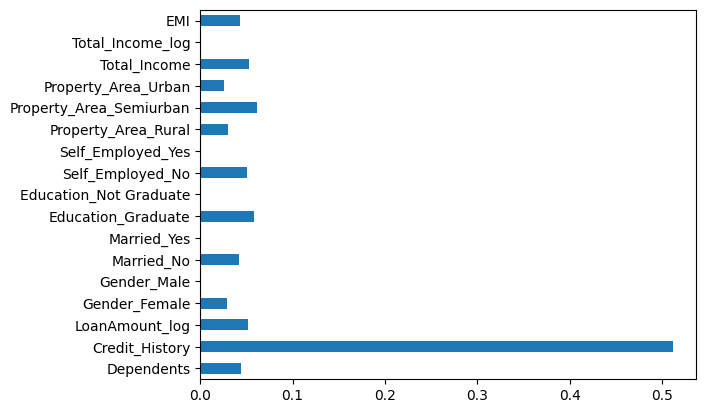

In [24]:
feat_impt = pd.Series(model.feature_importances_, index=X.columns)
feat_impt.plot(kind='barh')

We can see that ```Credit_History``` is a very important feature.

## XGBoost

In [43]:
i = 1
mean = 0
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print(f'{i} of kfold{kf.n_splits}\n')
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = XGBClassifier(n_estimators=20, max_depth=4)
    model.fit(xtr, ytr)
    pred_cv=model.predict(xvl)
    score=accuracy_score(yvl, pred_cv)
    mean += score
    print('Accuracy Score --> ', score)
    i+=1
    pred_test_cv = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print('Mean Validation Accuracy --> ', mean/(i-1))

1 of kfold5

Accuracy Score -->  0.7886178861788617
2 of kfold5

Accuracy Score -->  0.7967479674796748
3 of kfold5

Accuracy Score -->  0.7886178861788617
4 of kfold5

Accuracy Score -->  0.7967479674796748
5 of kfold5

Accuracy Score -->  0.7950819672131147
Mean Validation Accuracy -->  0.7931627349060376


# HyperParameter Optimization

## GridSearch

In [25]:
paramgrid = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
grid_search = GridSearchCV(XGBClassifier(), paramgrid)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
grid_search.fit(X, y)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2),
                         'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
                         'subsample': [0.6, 0.7, 0.8, 0.9]})

In [26]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'max_depth': 3,
 'min_child_weight': 3,
 'reg_alpha': 0,
 'subsample': 0.9}

# Best Model

In [44]:
i = 1
mean = 0
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print(f'{i} of kfold{kf.n_splits}')
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = XGBClassifier(colsample_bytree=0.7, gamma=0, max_depth=3, min_child_weight=3, reg_alpha=0, subsample=0.9, n_estimators=30)
    model.fit(xtr, ytr)
    pred_cv=model.predict(xvl)
    score=accuracy_score(yvl, pred_cv)
    mean += score
    print('Accuracy Score --> ', score)
    i+=1
    pred_test_cv = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print('Mean Validation Accuracy --> ', mean/(i-1))

1 of kfold5
Accuracy Score -->  0.8292682926829268
2 of kfold5
Accuracy Score -->  0.8048780487804879
3 of kfold5
Accuracy Score -->  0.7967479674796748
4 of kfold5
Accuracy Score -->  0.7886178861788617
5 of kfold5
Accuracy Score -->  0.7950819672131147
Mean Validation Accuracy -->  0.8029188324670132


# Final Results

We can observe from the above results that Logistic Regression is the best model for our data. But after hyperparameter tuning we observe that XGBoost is our best model.

# Conclusion

Through this project, I tried to create an automatic approval system for banks predicting approval decision on the basis of variety of factors.

We had a classification problem and had to predict on the basis of discrete variables.
Loan Eligibility prediction is a common problem that banks face on daily basis. By automating we can save hours of work.